In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import_data = pd.read_csv('Import.csv')
export_data = pd.read_csv('Export.csv')

In [3]:
import_data.head()

,Unnamed: 0,HSCODE,COMMODITY,VALUE,COUNTRY,YEAR
0,1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
1,2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
2,3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
3,5,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",8.32,AFGHANISTAN TIS,2018
4,6,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",108.78,AFGHANISTAN TIS,2018


In [4]:
export_data.head()

,Unnamed: 0,HSCODE,COMMODITY,VALUE,COUNTRY,YEAR
0,0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
2,4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018
3,5,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,25.01,AFGHANISTAN TIS,2018
4,6,9,"COFFEE, TEA, MATE AND SPICES.",13.75,AFGHANISTAN TIS,2018


In [5]:
import_data.describe()

,Unnamed: 0,HSCODE,VALUE,YEAR
count,54554.000000,54554.000000,54554.000000,54554.000000
mean,51272.969406,53.173901,72.382263,2014.009440
std,27878.217635,27.201885,720.148770,2.613452
min,1.000000,1.000000,0.010000,2010.000000
25%,35524.500000,29.000000,0.080000,2012.000000
50%,55410.500000,53.000000,0.720000,2014.000000
75%,74615.500000,76.000000,7.187500,2016.000000
max,93090.000000,99.000000,32781.570000,2018.000000


In [6]:
export_data.describe()

,Unnamed: 0,HSCODE,VALUE,YEAR
count,106590.000000,106590.000000,106590.00000,106590.000000
mean,68578.386706,50.630847,24.30115,2014.055756
std,39538.876518,27.471210,239.89897,2.578724
min,0.000000,1.000000,0.01000,2010.000000
25%,34316.000000,28.000000,0.08000,2012.000000
50%,68639.500000,52.000000,0.66000,2014.000000
75%,102842.750000,73.000000,5.23750,2016.000000
max,137022.000000,99.000000,19805.17000,2018.000000


### How many commodities do we trade?

In [7]:
len(import_data['COMMODITY'].unique())

98

In [8]:
len(export_data['COMMODITY'].unique())

98

In [9]:
import_data['COMMODITY'].value_counts().head()

ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.    1378
IRON AND STEEL                                                                                                                                            1333
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.                                                                            1314
ALUMINIUM AND ARTICLES THEREOF.                                                                                                                           1217
PLASTIC AND ARTICLES THEREOF.                                                                                                                             1112
Name: COMMODITY, dtype: int64

### Who are our top trading partners?

In [13]:
import_country = import_data.groupby('COUNTRY').agg({'VALUE':'sum'}).sort_values(by='VALUE', ascending = False)
import_country.head(20)

,VALUE
COUNTRY,
CHINA P RP,532177.51
U ARAB EMTS,256286.08
SAUDI ARAB,241554.99
U S A,219276.66
SWITZERLAND,206729.03
IRAQ,142476.32
INDONESIA,128164.40
KOREA RP,121143.58
GERMANY,119664.64


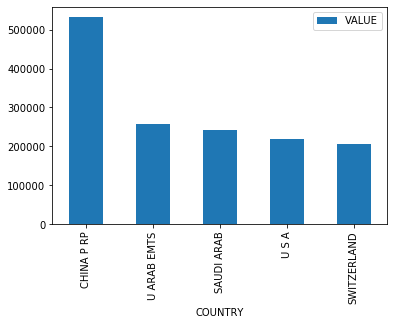

In [14]:
import_country_5 = import_country.head()
import_country_5.plot(kind = 'bar')

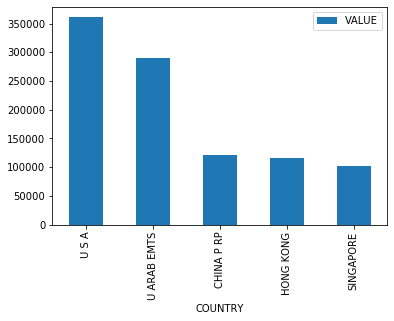

In [15]:
export_country = export_data.groupby('COUNTRY').agg({'VALUE':'sum'}).sort_values(by='VALUE',ascending=False)
export_country_5 = export_country.head()
export_country_5.plot(kind='bar')

### What are the top commodities we are trading?

In [16]:
import_commodity_5 = import_data.groupby('COMMODITY').agg({'VALUE':'sum'}).sort_values(by='VALUE',ascending = False)


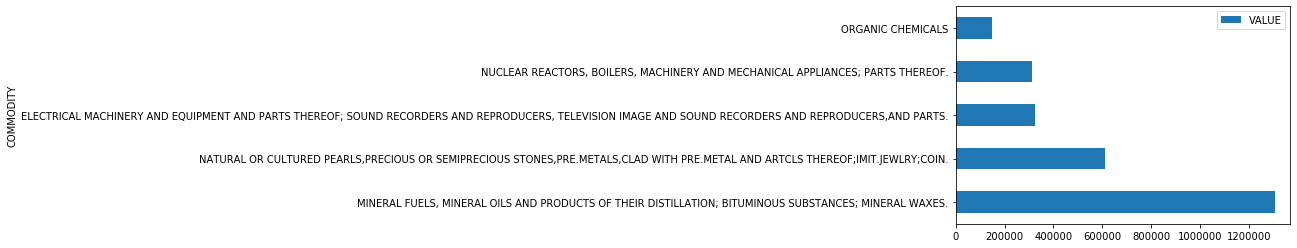

In [18]:
import_commodity_5.head().plot(kind='barh')

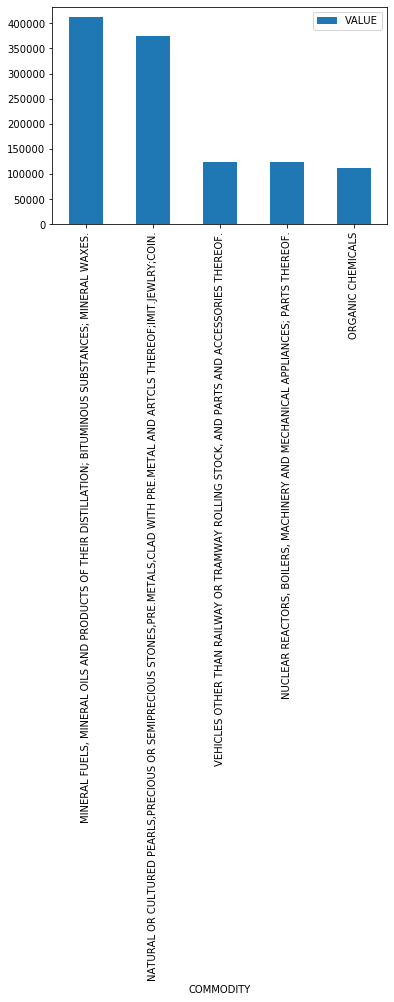

In [19]:
export_data.groupby('COMMODITY').agg({'VALUE':'sum'}).sort_values(by='VALUE', ascending = False).head().plot(kind='bar')

### What has our volume of trading looked like over the years?


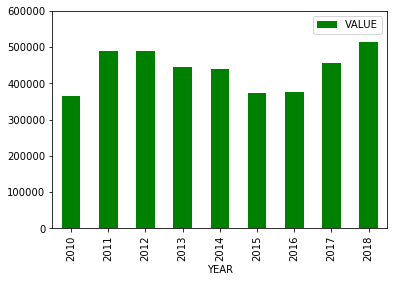

In [20]:
import_data.groupby('YEAR').agg({'VALUE':'sum'}).sort_values(by='YEAR').plot(kind='bar', ylim=(0,600000),color = 'green')

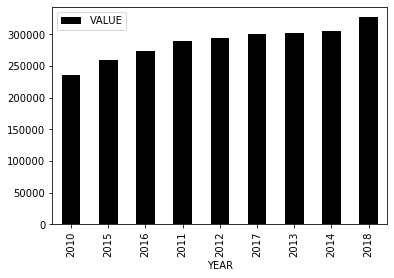

In [21]:
export_data.groupby('YEAR').agg({'VALUE':'sum'}).sort_values('VALUE').plot(kind = 'bar', color='black')

### Have we been in deficit or surplus?

In [23]:
import_year = import_data.groupby('YEAR').agg({'VALUE':'sum'}).sort_values(by='YEAR')
export_year = export_data.groupby('YEAR').agg({'VALUE':'sum'}).sort_values('VALUE')
trade = export_year - import_year

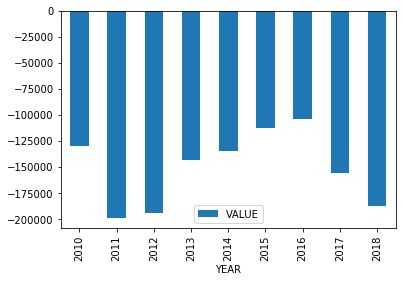

In [24]:
trade.plot(kind = 'bar')

In [25]:
import_country.sort_values(by='COUNTRY', inplace=True)
export_country.sort_values(by='COUNTRY', inplace=True)

In [28]:
top_commodity_2018 = import_data[import_data['YEAR']==2018].groupby('COMMODITY').agg({'VALUE':'sum'}).sort_values(by='VALUE', ascending = False)

In [29]:
top_commodity_2018.head()

,VALUE
COMMODITY,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",167860.72
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",64712.89
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",52045.96
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",43835.06
ORGANIC CHEMICALS,22382.64
